In [66]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 
X1_positive = []
X2_positive = []
X1_negative = []
X2_negative = []

for i in range(3):
    X1_positive.append(random.uniform(0,1))
    X2_positive.append(random.uniform(0,1))
    X1_negative.append(random.uniform(-1,0))
    X2_negative.append(random.uniform(-1,0))
    
#label the data
data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
data2 = [np.array([X1_negative[i],X2_negative[i],-1]) for i in range(3)]
data = data1 + data2

In [67]:
a = random.uniform(-1,1)

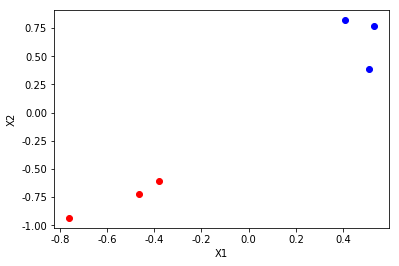

In [68]:
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [69]:
class Perceptron(object):
    def __init__(self, data,a):
        self.W = np.zeros(len(data[0:3]))
        self.a = a;
    
    def predict(self, x):
        activation = np.sign(x-self.W[0])
        return activation
    
    def fit(self, data):
        X2 = np.array(data)[:,1:2]
        d = np.array(data)[:, 2]
        self.W[0]=self.a;
        for i in range(len(data)):
            y = self.predict(X2[i])
            if y != d[i]:
                self.W = self.W + d[i] * X2[i]
                
       
                    
            

In [70]:
print(data)

[array([0.51107836, 0.38713661, 1.        ]), array([0.40804161, 0.82025114, 1.        ]), array([0.52908739, 0.77105342, 1.        ]), array([-0.46647856, -0.72615083, -1.        ]), array([-0.75982492, -0.93542074, -1.        ]), array([-0.38072589, -0.60625134, -1.        ])]


In [71]:
perceptron = Perceptron(data,a)
perceptron.fit(data)
print("Weight matrix =",perceptron.W)


Weight matrix = [-0.47556343  0.          0.        ]


In [72]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(np.array(data)[:,0:2],np.array(data)[:,2])
print(clf.coef_[0])
W = clf.coef_[0]
b = clf.intercept_[0]
print("W0 = ", W[0])
print("W1 = ", W[1])
print("b = ", b)

[0.89180425 0.99338795]
W0 =  0.8918042479579049
W1 =  0.9933879529791636
b =  0.03956639766693115


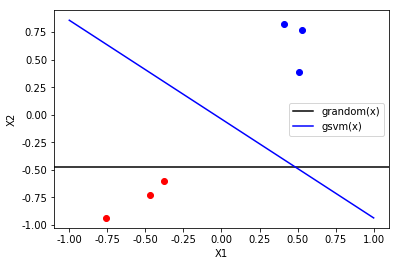

In [73]:
from collections import OrderedDict
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
X = np.array(data)[:,0:2]
plt.axhline(perceptron.W[0], color='black', linestyle='-', label='grandom(x)')
plt.plot(x, (-W[0]*x-b)/W[1], color='blue', linestyle='-',label='gsvm(x)' )
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [74]:
def RandomDataPointsGenerator():
    X1_positive = []
    X2_positive = []
    X1_negative = []
    X2_negative = []
    
    for i in range(3):
        X1_positive.append(random.uniform(0,1))
        X2_positive.append(random.uniform(0,1))
        X1_negative.append(random.uniform(-1,0))
        X2_negative.append(random.uniform(-1,0))

    #label the data
    data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
    data2 = [np.array([X1_negative[i],X2_negative[i],-1]) for i in range(3)]
    data = data1 + data2
    return data

In [ ]:
random_a_array = []
random_svm_a_array = []

for i in range(1,100001):
    data = RandomDataPointsGenerator()
    clf.fit(np.array(data)[:,0:2],np.array(data)[:,2])
    W = clf.coef_[0]
    b = clf.intercept_[0]
    perceptron.fit(data)
    random_a_array.append(-perceptron.W[0])
    random_svm_a_array.append(-b)

In [ ]:
plt.hist(random_a_array, bins='auto')
plt.show()

In [ ]:
plt.hist(random_svm_a_array, bins='auto')
plt.show()

In [133]:
#Comparing the histogram we get gaussian distribution for asvm while for arandom we get uneven distribution.